<a href="https://colab.research.google.com/github/FGalvao77/Machine-Learning-com-Spark-Exemplos-Praticos/blob/main/Machine_Learning_com_Spark_Exemplos_Pr%C3%A1ticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning com Spark: Exemplos Práticos**





---



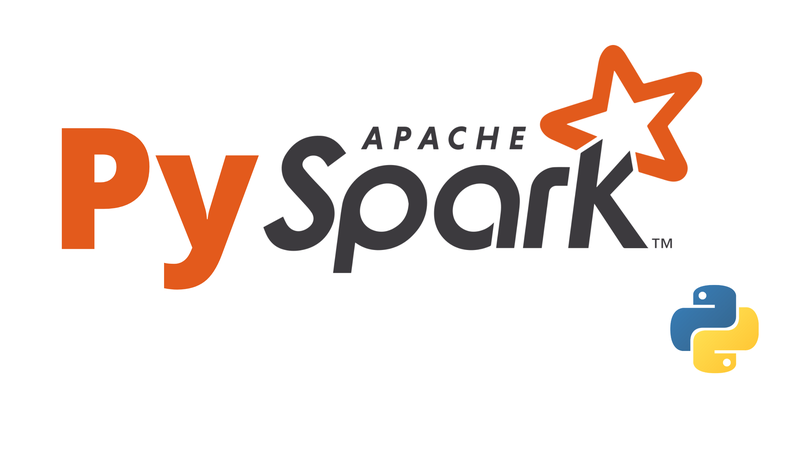

## **Breve introdução**

**Apache Spark**

`Apache Spark` é um [framework](https://pt.wikipedia.org/wiki/Framework) de [código fonte aberto](https://pt.wikipedia.org/wiki/C%C3%B3digo_fonte_aberto) para [computação distribuída](https://pt.wikipedia.org/wiki/Computa%C3%A7%C3%A3o_distribu%C3%ADda). Foi desenvolvido no AMPLab da [Universidade da Califórnia](https://pt.wikipedia.org/wiki/Universidade_da_Calif%C3%B3rnia) e posteriormente repassado para a [Apache Software Foundation](https://pt.wikipedia.org/wiki/Apache_Software_Foundation) que o mantém desde então. Spark provê uma interface para [programação](https://pt.wikipedia.org/wiki/Programa%C3%A7%C3%A3o) de clusters com [paralelismo](https://pt.wikipedia.org/wiki/Paralelismo) e [tolerância a falhas](https://pt.wikipedia.org/wiki/Toler%C3%A2ncia_a_falhas).

- fonte: https://pt.wikipedia.org/wiki/Apache_Spark

Para conhecer mais, visite o site:

- https://spark.apache.org/

### **Modelo de regressão utilizando uma floresta aleatória**

- https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.mllib.tree.RandomForest.html

#### **1. Preparando o ambiente e carregando o conjunto de dados**

In [ ]:
# instalando o pyspark
!pip install pyspark

     |████████████████████████████████| 281.3 MB 35 kB/s 
     |████████████████████████████████| 198 kB 56.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=8430f8562c0f11a82feabc1cb1c14247c74a5a5a1d3d18cae414a99f19479368
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [ ]:
# instalando as dependências
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz
!tar xf spark-3.1.2-bin-hadoop2.7.tgz
!pip install -q findspark
!pip install -q pyspark

In [ ]:
# configurando as variáveis de ambiente
import os

os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-8-openjdk-amd64'
os.environ['SPARK_HOME'] = '/content/spark-3.1.2-bin-hadoop2.7'

# tornando o pyspark "importável"
import findspark

# findspark.init()
findspark.init('spark-3.1.2-bin-hadoop2.7')

In [ ]:
# importando a biblioteca para iniciar uma sessão spark
from pyspark.sql import SparkSession

In [ ]:
# iniciando uma sessão spark - usamos quando se trabalha com dataframes no spark
# definindo uma sessão mínima para atividade
spark = SparkSession.builder\
        .master('local[*]')\
        .appName('Machine Learning com Spark: Exemplos Práticos - Random Forest c/ Dataset cars')\
        .getOrCreate()

In [ ]:
# visualizando a sessão criada e sua configurações 
spark

In [ ]:
# realizando o download do https para arquivo local
!wget --quiet --show-progress https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv

cars.csv            100%[===================>]   1.74K  --.-KB/s    in 0s      


In [ ]:
# carregando os dados
carros = spark.read.csv('/content/cars.csv', inferSchema=True, header=True, sep=',')

#### **2. Análise exploratória dos dados**

In [ ]:
# visualizando o tipo do objeto da variável 
type (carros)

pyspark.sql.dataframe.DataFrame

In [ ]:
# com a função ".printSchema()" visualizando informações sobre os tipos de dados de cada coluna
carros.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- mpg: double (nullable = true)
 |-- cyl: integer (nullable = true)
 |-- disp: double (nullable = true)
 |-- hp: integer (nullable = true)
 |-- drat: double (nullable = true)
 |-- wt: double (nullable = true)
 |-- qsec: double (nullable = true)
 |-- vs: integer (nullable = true)
 |-- am: integer (nullable = true)
 |-- gear: integer (nullable = true)
 |-- carb: integer (nullable = true)



In [ ]:
# visualizando a quantidade de linhas com a função ".count()"
carros.count()

32

In [ ]:
# nome das colunas
carros.columns

['_c0',
 'mpg',
 'cyl',
 'disp',
 'hp',
 'drat',
 'wt',
 'qsec',
 'vs',
 'am',
 'gear',
 'carb']

In [ ]:
# visualizando as 5 primeiras linhas
carros.take(5)

[Row(_c0='Mazda RX4', mpg=21.0, cyl=6, disp=160.0, hp=110, drat=3.9, wt=2.62, qsec=16.46, vs=0, am=1, gear=4, carb=4),
 Row(_c0='Mazda RX4 Wag', mpg=21.0, cyl=6, disp=160.0, hp=110, drat=3.9, wt=2.875, qsec=17.02, vs=0, am=1, gear=4, carb=4),
 Row(_c0='Datsun 710', mpg=22.8, cyl=4, disp=108.0, hp=93, drat=3.85, wt=2.32, qsec=18.61, vs=1, am=1, gear=4, carb=1),
 Row(_c0='Hornet 4 Drive', mpg=21.4, cyl=6, disp=258.0, hp=110, drat=3.08, wt=3.215, qsec=19.44, vs=1, am=0, gear=3, carb=1),
 Row(_c0='Hornet Sportabout', mpg=18.7, cyl=8, disp=360.0, hp=175, drat=3.15, wt=3.44, qsec=17.02, vs=0, am=0, gear=3, carb=2)]

In [ ]:
# visualizando o conjunto de dados em formato de tabela
carros.show()    # por padrão é exibido as 20 primeiras linhas

+-------------------+----+---+-----+---+----+-----+-----+---+---+----+----+
|                _c0| mpg|cyl| disp| hp|drat|   wt| qsec| vs| am|gear|carb|
+-------------------+----+---+-----+---+----+-----+-----+---+---+----+----+
|          Mazda RX4|21.0|  6|160.0|110| 3.9| 2.62|16.46|  0|  1|   4|   4|
|      Mazda RX4 Wag|21.0|  6|160.0|110| 3.9|2.875|17.02|  0|  1|   4|   4|
|         Datsun 710|22.8|  4|108.0| 93|3.85| 2.32|18.61|  1|  1|   4|   1|
|     Hornet 4 Drive|21.4|  6|258.0|110|3.08|3.215|19.44|  1|  0|   3|   1|
|  Hornet Sportabout|18.7|  8|360.0|175|3.15| 3.44|17.02|  0|  0|   3|   2|
|            Valiant|18.1|  6|225.0|105|2.76| 3.46|20.22|  1|  0|   3|   1|
|         Duster 360|14.3|  8|360.0|245|3.21| 3.57|15.84|  0|  0|   3|   4|
|          Merc 240D|24.4|  4|146.7| 62|3.69| 3.19| 20.0|  1|  0|   4|   2|
|           Merc 230|22.8|  4|140.8| 95|3.92| 3.15| 22.9|  1|  0|   4|   2|
|           Merc 280|19.2|  6|167.6|123|3.92| 3.44| 18.3|  1|  0|   4|   4|
|          M

> Podemos ver que na coluna `_c0` trata do nome do veículo. Irei eliminá-la do conjunto de dados, já que a mesma não agregará a nossa análise.

In [ ]:
# realizando um drop na coluna "_c0" e sobreescrendo a variável "carros"
carros = carros.drop('_c0')
carros.show(5)  # visualizando as 5 primeiras linhas

+----+---+-----+---+----+-----+-----+---+---+----+----+
| mpg|cyl| disp| hp|drat|   wt| qsec| vs| am|gear|carb|
+----+---+-----+---+----+-----+-----+---+---+----+----+
|21.0|  6|160.0|110| 3.9| 2.62|16.46|  0|  1|   4|   4|
|21.0|  6|160.0|110| 3.9|2.875|17.02|  0|  1|   4|   4|
|22.8|  4|108.0| 93|3.85| 2.32|18.61|  1|  1|   4|   1|
|21.4|  6|258.0|110|3.08|3.215|19.44|  1|  0|   3|   1|
|18.7|  8|360.0|175|3.15| 3.44|17.02|  0|  0|   3|   2|
+----+---+-----+---+----+-----+-----+---+---+----+----+
only showing top 5 rows



**Vamos renomear as colunas! Ou melhor traduzi-las para facilitar nossas observações.**

In [ ]:
# criando uma função para otimizar a renomeação das colunas
def renameCols(df, old_columns, new_columns):
    for old_cols, new_cols in zip(old_columns, new_columns):
        df = df.withColumnRenamed(old_cols, new_cols)
    return df

In [ ]:
# instanciando a colunas atuais e o nome das colunas traduzidas
old_cols = carros.columns
new_cols = ['consumo', 'cilindros', 'cilindradas', 'potencia', 'relacaoEixoTras', 
            'peso', 'tempo', 'tipoMotor', 'transmissao', 'marchas', 'carburadores']

In [ ]:
# veja que, os dois tipo de objetos são listas e do mesmo tamanhos
type (old_cols), len(old_cols), type (new_cols), len(new_cols)

(list, 11, list, 11)

In [ ]:
# aplicando a função no conjunto de dados e sobreescrevendo a variável "housing_df"
carros = renameCols(carros, old_cols, new_cols)

In [ ]:
# visualizando se o nome das colunas foram traduzidas
carros.columns

['consumo',
 'cilindros',
 'cilindradas',
 'potencia',
 'relacaoEixoTras',
 'peso',
 'tempo',
 'tipoMotor',
 'transmissao',
 'marchas',
 'carburadores']

In [ ]:
# visualizando as 5 primeiras linhas
carros.show(5)

+-------+---------+-----------+--------+---------------+-----+-----+---------+-----------+-------+------------+
|consumo|cilindros|cilindradas|potencia|relacaoEixoTras| peso|tempo|tipoMotor|transmissao|marchas|carburadores|
+-------+---------+-----------+--------+---------------+-----+-----+---------+-----------+-------+------------+
|   21.0|        6|      160.0|     110|            3.9| 2.62|16.46|        0|          1|      4|           4|
|   21.0|        6|      160.0|     110|            3.9|2.875|17.02|        0|          1|      4|           4|
|   22.8|        4|      108.0|      93|           3.85| 2.32|18.61|        1|          1|      4|           1|
|   21.4|        6|      258.0|     110|           3.08|3.215|19.44|        1|          0|      3|           1|
|   18.7|        8|      360.0|     175|           3.15| 3.44|17.02|        0|          0|      3|           2|
+-------+---------+-----------+--------+---------------+-----+-----+---------+-----------+-------+------

In [ ]:
# estatística descritiva dos conjunto de dados
carros.describe().show()

+-------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+
|summary|           consumo|         cilindros|       cilindradas|         potencia|   relacaoEixoTras|              peso|             tempo|         tipoMotor|        transmissao|           marchas|      carburadores|
+-------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+
|  count|                32|                32|                32|               32|                32|                32|                32|                32|                 32|                32|                32|
|   mean|20.090624999999996|            6.1875|230.72187500000004|         146.6875|3.5965625000000006|3.2172499999999995|17

#### **3. Pré-processamento dos dados**

In [ ]:
# importando a biblioteca para instanciar a variavel alvo e as variáveis explicativas
from pyspark.ml.feature import RFormula

In [ ]:
# instanciando a variável dependente (alvo) e as variáveis independentes (explicativas)
RFormula = RFormula(formula='potencia ~ consumo + cilindros + cilindradas', 
                    labelCol='varDependente', featuresCol='varsIndependente')

In [ ]:
# realizando a transformação das variáveis instanciadas acima e instanciando o resultado na variável "carrosRF"
carrosRF = RFormula.fit(carros).transform(carros)

In [ ]:
# visualizando as features criadas
carrosRF.select('varsIndependente', 'varDependente').show(5)

+----------------+-------------+
|varsIndependente|varDependente|
+----------------+-------------+
|[21.0,6.0,160.0]|        110.0|
|[21.0,6.0,160.0]|        110.0|
|[22.8,4.0,108.0]|         93.0|
|[21.4,6.0,258.0]|        110.0|
|[18.7,8.0,360.0]|        175.0|
+----------------+-------------+
only showing top 5 rows



In [ ]:
# importando a biblioteca para realizar a normalização dos dados
from pyspark.ml.feature import Normalizer

In [ ]:
# instanciando o modelo e aplicando a normalização dos dados nas variáveis independentes
# e como saída da normalização criando o recurso (feature) "varIndependenteNorm"
normalizador = Normalizer(inputCol='varsIndependente', 
                          outputCol='varsIndependenteNorm', p=1.0)

In [ ]:
# aplicando o normalizado no conjunto de dados
carrosNorm = normalizador.transform(carrosRF)

In [ ]:
# visualizando as features criadas
carrosNorm.select('varsIndependente', 'varDependente', 
                  'varsIndependenteNorm').show(5, truncate=True)

+----------------+-------------+--------------------+
|varsIndependente|varDependente|varsIndependenteNorm|
+----------------+-------------+--------------------+
|[21.0,6.0,160.0]|        110.0|[0.11229946524064...|
|[21.0,6.0,160.0]|        110.0|[0.11229946524064...|
|[22.8,4.0,108.0]|         93.0|[0.16913946587537...|
|[21.4,6.0,258.0]|        110.0|[0.07498248072880...|
|[18.7,8.0,360.0]|        175.0|[0.04835790018101...|
+----------------+-------------+--------------------+
only showing top 5 rows



In [ ]:
# particionando o conjunto de dados "carrosNorm" em treino e teste
# 80% dos dados para treino e o restante, 20% para teste
# e definindo a semente em "111" para reprodutibilidade do modelo 
carrosTreino, carrosTeste = carrosNorm.randomSplit([0.8, 0.2], seed=111) 

In [ ]:
# visualizando o tamanho do particionamento do dados
carrosTreino.count(), carrosTeste.count()

(25, 7)

#### **4. Aplicando o modelo de floresta aleatória**

In [ ]:
# importando a biblioteca de floresta aleatória
from pyspark.ml.regression import RandomForestRegressor

In [ ]:
# instanciando o modelo e os argumentos de entrada e a respectiva saída
# definindo que as árvores terá profundidade máxima de 10 e com número máximo de 500 árvores e a semente igual a 20
rf = RandomForestRegressor(featuresCol='varsIndependenteNorm', labelCol='varDependente',
                           maxDepth=10, numTrees=500, seed=20)

In [ ]:
# treinando o modelo no conjunto de dados de treino
modelo = rf.fit(carrosTreino)

In [ ]:
# aplicando o modelo após seu treinamento com os dados de teste "carrosTeste"
pred = modelo.transform(carrosTeste)

In [ ]:
# visualizando as predições realizadas pelo modelo
pred.select('varDependente', 'prediction').show()

+-------------+----------+
|varDependente|prediction|
+-------------+----------+
|        205.0|   219.256|
|        245.0|   233.088|
|        335.0|    158.55|
|        110.0|   117.594|
|        109.0|    98.796|
|         93.0|    99.088|
|         52.0|    71.682|
+-------------+----------+



#### **5. Avaliando a performance do modelo**

In [ ]:
# importando a biblioteca para avaliação
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
# instanciando o avaliador - usaremos como métrica o RMSE
# podemos usar como métricas de avaliação: rmse, mse, r2, mae, var
avaliador_rmse = RegressionEvaluator(predictionCol='prediction', 
                                labelCol='varDependente', 
                                metricName='rmse')

In [ ]:
# aplicando o avaliador nas predições
rmse = avaliador_rmse.evaluate(pred)

# visualizando o resultado do RMSE
rmse

67.68199496806474

**Vamos utlizar outras métricas de avaliação**

In [ ]:
# usraemos agora as demais métricas de avaliação: mse, r2, mae, var
avaliador_mse = RegressionEvaluator(predictionCol='prediction', 
                                labelCol='varDependente', 
                                metricName='mse')

avaliador_r2 = RegressionEvaluator(predictionCol='prediction', 
                                labelCol='varDependente', 
                                metricName='r2')

avaliador_mae = RegressionEvaluator(predictionCol='prediction', 
                                labelCol='varDependente', 
                                metricName='mae')

avaliador_var = RegressionEvaluator(predictionCol='prediction', 
                                labelCol='varDependente', 
                                metricName='var')

In [ ]:
# aplicando os avaliadores nas predições
mse = avaliador_mse.evaluate(pred)
r2 = avaliador_r2.evaluate(pred)
mae = avaliador_mae.evaluate(pred)
var = avaliador_var.evaluate(pred)

# visualizando o resultado dos avaliadores
print('RMSE:', rmse)
print('MSE:', mse)
print('R2:', r2)
print('MAE:', mae)
print('VAR:', var)

RMSE: 67.68199496806474
MSE: 4580.852442857142
R2: 0.4744047241384156
MAE: 35.16942857142857
VAR: 3862.903381632649


### **Modelo de classificação utilizando uma rede neural**

- https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.classification.MultilayerPerceptronClassificationModel.html?highlight=multi%20layer#pyspark.ml.classification.MultilayerPerceptronClassificationModel

#### **1. Preparando o ambiente e carregando o conjunto de dados**

In [ ]:
# instalando o pyspark
!pip install pyspark

     |████████████████████████████████| 281.3 MB 36 kB/s 
     |████████████████████████████████| 198 kB 35.5 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=1902ec26b5b88dc693bf9f52cc9afa103a14475b166206499e87206f2b8b5794
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [1]:
# instalando as dependências
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz
!tar xf spark-3.1.2-bin-hadoop2.7.tgz
!pip install -q findspark
!pip install -q pyspark

     |████████████████████████████████| 281.3 MB 37 kB/s 
     |████████████████████████████████| 198 kB 54.3 MB/s 


In [2]:
# configurando as variáveis de ambiente
import os

os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-8-openjdk-amd64'
os.environ['SPARK_HOME'] = '/content/spark-3.1.2-bin-hadoop2.7'

# tornando o pyspark "importável"
import findspark

# findspark.init()
findspark.init('spark-3.1.2-bin-hadoop2.7')

In [3]:
# importando a biblioteca para iniciar uma sessão spark
from pyspark.sql import SparkSession

In [4]:
# iniciando uma sessão spark - usamos quando se trabalha com dataframes no spark
# definindo uma sessão mínima para atividade
spark = SparkSession.builder\
        .master('local[*]')\
        .appName('Machine Learning com Spark: Exemplos Práticos - Multilayer Perceptron Classifier c/ Dataset iris')\
        .getOrCreate()

In [5]:
# visualizando a sessão criada e sua configurações 
spark

In [6]:
# realizando o download do https para arquivo local
!wget --quiet --show-progress https://raw.githubusercontent.com/FGalvao77/datasets/main/iris.csv

iris.csv            100%[===================>]   3.63K  --.-KB/s    in 0s      


In [62]:
# carregando os dados
iris = spark.read.csv('/content/iris.csv', inferSchema=True, header=True)

#### **2. Análise exploratória dos dados**

In [63]:
# visualizando o tipo do objeto da variável 
type (iris)

pyspark.sql.dataframe.DataFrame

In [64]:
# com a função ".printSchema()" visualizando informações sobre os tipos de dados de cada coluna
iris.printSchema()

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- species: string (nullable = true)



In [65]:
# visualizando a quantidade de linhas com a função ".count()"
iris.count()

150

In [66]:
# visualizando as 5 primeiras linhas
iris.show(5)

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
|         5.0|        3.6|         1.4|        0.2| setosa|
+------------+-----------+------------+-----------+-------+
only showing top 5 rows



In [67]:
# estatistica descritiva
iris.describe().show()

+-------+------------------+-------------------+------------------+------------------+---------+
|summary|      sepal_length|        sepal_width|      petal_length|       petal_width|  species|
+-------+------------------+-------------------+------------------+------------------+---------+
|  count|               150|                150|               150|               150|      150|
|   mean| 5.843333333333335| 3.0540000000000007|3.7586666666666693|1.1986666666666672|     null|
| stddev|0.8280661279778637|0.43359431136217375| 1.764420419952262|0.7631607417008414|     null|
|    min|               4.3|                2.0|               1.0|               0.1|   setosa|
|    max|               7.9|                4.4|               6.9|               2.5|virginica|
+-------+------------------+-------------------+------------------+------------------+---------+



In [69]:
# selecionando somente as colunas numéricas e visualizando a estatistica descritiva 
iris.select('sepal_length', 'sepal_width', 
            'petal_length', 'petal_width').describe().show()

+-------+------------------+-------------------+------------------+------------------+
|summary|      sepal_length|        sepal_width|      petal_length|       petal_width|
+-------+------------------+-------------------+------------------+------------------+
|  count|               150|                150|               150|               150|
|   mean| 5.843333333333335| 3.0540000000000007|3.7586666666666693|1.1986666666666672|
| stddev|0.8280661279778637|0.43359431136217375| 1.764420419952262|0.7631607417008414|
|    min|               4.3|                2.0|               1.0|               0.1|
|    max|               7.9|                4.4|               6.9|               2.5|
+-------+------------------+-------------------+------------------+------------------+



In [70]:
# particionando o conjunto de dados em dados de treno e tesste
irisTrain, irisTest = iris.randomSplit([0.7, 0.3])

In [71]:
# visualizando o tamanho do particionamento do dados
irisTrain.count(), irisTest.count()

(110, 40)

In [72]:
# visualizando 5 primeiras linhas da base de treino
irisTrain.show(5)

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         4.3|        3.0|         1.1|        0.1| setosa|
|         4.4|        2.9|         1.4|        0.2| setosa|
|         4.4|        3.2|         1.3|        0.2| setosa|
|         4.5|        2.3|         1.3|        0.3| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
+------------+-----------+------------+-----------+-------+
only showing top 5 rows



In [73]:
# visualizando 5 primeiras linhas da base de teste
irisTest.show(5)

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         4.4|        3.0|         1.3|        0.2| setosa|
|         4.6|        3.2|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.7|        3.2|         1.6|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
+------------+-----------+------------+-----------+-------+
only showing top 5 rows



#### **3. Pré-processamento dos dados**

In [74]:
# importando a biblioteca para criação de vetores
from pyspark.ml.feature import VectorAssembler

In [75]:
# aplicando a biblioteca e instanciando um vetor com as variáveis independente
vector = VectorAssembler(inputCols=['sepal_length', 'sepal_width', 
                                    'petal_length', 'petal_width'], 
                         outputCol='varsIndependente')

In [76]:
# importando a biblioteca para rotular dados categóricos
from pyspark.ml.feature import StringIndexer

In [77]:
# com a biblioteca importada acima e instanciando os indíces da variável dependente
index = StringIndexer(inputCol='species', outputCol='label')

#### **4. Aplicando o modelo de rede neural**

In [78]:
# importando a biblioteca de uma rede neural
from pyspark.ml.classification import MultilayerPerceptronClassifier

In [79]:
# instanciando a rede neural com  os seguintes argumentos: 
# número máximo de iterações ("maxIter=100"), 
# camadas da rede neural - entrada, oculta e saída ("layers=[4, 5, 4, 3]"), 
# as colunas da variáveis independente e a coluna dos rótulos ("featuresCol='varsIndependente', labelCol='label'")
mlp = MultilayerPerceptronClassifier(maxIter=100, 
                                     layers=[4, 5, 4, 3],
                                     featuresCol='varsIndependente', 
                                     labelCol='label')

In [80]:
# importando a biblioteca para criação de pipelines
from pyspark.ml import Pipeline

In [81]:
# instancaindo o pipeline e passando os objetos "vector", "index" e "mlp"
pipeline = Pipeline(stages=[vector, index, mlp])

In [82]:
# instanciando o modelo e treinando-o com o pipeline definido acima
model = pipeline.fit(irisTrain)

In [83]:
# realizando as predições com o modelo após o treinamento do mesmo
preds = model.transform(irisTrain)

In [84]:
# visualizando o rótulo de cada instância e as predições realizadas pelo modelo
preds.select('label', 'prediction').show()

+-----+----------+
|label|prediction|
+-----+----------+
|  2.0|       2.0|
|  2.0|       2.0|
|  2.0|       2.0|
|  2.0|       2.0|
|  2.0|       2.0|
|  2.0|       2.0|
|  2.0|       2.0|
|  2.0|       2.0|
|  2.0|       2.0|
|  2.0|       2.0|
|  2.0|       2.0|
|  2.0|       2.0|
|  0.0|       0.0|
|  1.0|       1.0|
|  2.0|       2.0|
|  2.0|       2.0|
|  2.0|       2.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  2.0|       2.0|
+-----+----------+
only showing top 20 rows



#### **5. Avaliando a performance do modelo**

In [85]:
# importando a biblioteca para avaliação do modelo
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [86]:
# instanciando os rótulos, as predições e a métrica de avaliação do modelo
# nesse caso, utilizaremos como métrica a acurácia
avaliador = MulticlassClassificationEvaluator(labelCol='label', 
                                                predictionCol='prediction', 
                                                metricName='accuracy')

In [87]:
# aplicando o avaliador nas predições realizadas juntamente com a função ".evaluate()",
# passando como argumento o objeto "preds" (predições realizadas pelo modelo)
# e por fim, instanciando o resultado na variável "acurácia"
acuracia = avaliador.evaluate(preds)

# visualizando o resultado da acurácia
acuracia

0.990909090909091

> O modelo apresentou uma acurácia praticamente de 100%.

**Agora vamos aumentar a complexidade do modelo.**

Iremos utilizar um `tunning`, passando a validação cruzada (cross validation) e um gride de parâmetros como, número de iterações (10, 100 e 1000) e acrescentaremos uma subcamada de neurônios da rede neural.

#### **4.1. Aplicando o modelo de rede neural**

In [106]:
# instanciando a rede neural com as variáveis independente e os seus rótulos
mlp = MultilayerPerceptronClassifier(featuresCol='varsIndependente', 
                                     labelCol='label')

In [107]:
# importando a biblioteca para criação de pipelines
from pyspark.ml import Pipeline

In [108]:
# instancaindo o pipeline e passando os objetos "vector", "index" e "mlp"
pipeline = Pipeline(stages=[vector, index, mlp])

In [109]:
# importando as bibliotecas para realização de validação cruzada e definições dos parâmetros
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [111]:
# instanciando o grid e definindo as iterações e as camadas da rede neural
grid = ParamGridBuilder().addGrid(mlp.maxIter, 
                                  [10, 100, 1000]).addGrid(mlp.layers, 
                                                           [[4, 5, 4, 3], 
                                                            [4, 4, 3]]).build()

In [112]:
# instanciando o cross validation e seus parâmetros
crossVal = CrossValidator(estimator=pipeline, 
                          estimatorParamMaps=grid,
                          evaluator=MulticlassClassificationEvaluator(),
                          numFolds=3)

In [113]:
# instanciando o modelo e treinando-o com o cross validation definido acima
model = crossVal.fit(irisTrain)

In [116]:
# realizando as predições com o modelo após o treinamento do mesmo
preds = model.transform(irisTrain)

In [121]:
# visualizando as predições
preds.show(truncate=False)

+------------+-----------+------------+-----------+----------+-----------------+-----+-----------------------------------------------------------+-------------------------------------------------------------------+----------+
|sepal_length|sepal_width|petal_length|petal_width|species   |varsIndependente |label|rawPrediction                                              |probability                                                        |prediction|
+------------+-----------+------------+-----------+----------+-----------------+-----+-----------------------------------------------------------+-------------------------------------------------------------------+----------+
|4.3         |3.0        |1.1         |0.1        |setosa    |[4.3,3.0,1.1,0.1]|2.0  |[213.99964903421613,-437.33619949123783,221.75942243761443]|[4.263713551701606E-4,5.730904078716946E-287,0.9995736286448299]   |2.0       |
|4.4         |2.9        |1.4         |0.2        |setosa    |[4.4,2.9,1.4,0.2]|2.0  |[213.99818

In [117]:
# visualizando o rótulo de cada instância e as predições realizadas pelo modelo
preds.select('label', 'prediction').show()

+-----+----------+
|label|prediction|
+-----+----------+
|  2.0|       2.0|
|  2.0|       2.0|
|  2.0|       2.0|
|  2.0|       2.0|
|  2.0|       2.0|
|  2.0|       2.0|
|  2.0|       2.0|
|  2.0|       2.0|
|  2.0|       2.0|
|  2.0|       2.0|
|  2.0|       2.0|
|  2.0|       2.0|
|  0.0|       0.0|
|  1.0|       1.0|
|  2.0|       2.0|
|  2.0|       2.0|
|  2.0|       2.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  2.0|       2.0|
+-----+----------+
only showing top 20 rows



#### **5.1. Avaliando a performance do modelo**

In [118]:
# importando a biblioteca para avaliação do modelo
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [119]:
# instanciando os rótulos, as predições e a métrica de avaliação do modelo
# nesse caso, utilizaremos como métrica a acurácia
avaliador = MulticlassClassificationEvaluator(labelCol='label', 
                                                predictionCol='prediction', 
                                                metricName='accuracy')

In [120]:
# aplicando o avaliador nas predições realizadas juntamente com a função ".evaluate()",
# passando como argumento o objeto "preds" (predições realizadas pelo modelo)
# e por fim, instanciando o resultado na variável "acurácia"
acuracia = avaliador.evaluate(preds)

# visualizando o resultado da acurácia
acuracia

1.0

> Veja que o modelo teve uma acurácia de 100%. 


Deixo como dica um artigo de consulta sobre o que é um `underfitting` e `overfitting`.
- https://didatica.tech/underfitting-e-overfitting/

Esses conceitos é importantissímo para avaliação de um modelo.